In [7]:
import numpy as  np  
import tensorflow as tf
from  tensorflow import  keras  
import  matplotlib.pyplot as plt 


In [8]:
# importing  the  minst dataset 

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [13]:
x_train.shape

(60000, 28, 28)

In [17]:
# converting  to  1 dimension
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)



In [19]:
# scaling the  data set 
x_train_flat=x_train_flat/255
x_test_flat=x_test_flat/255

In [22]:
x_train_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
#model building
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
optimizer="adam",
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [41]:
model.fit(x_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 708us/step - loss: 0.4677 - accuracy: 0.8781
Epoch 2/10
1875/1875 [==============================] - 1s 626us/step - loss: 0.3040 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 1s 623us/step - loss: 0.2836 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 1s 636us/step - loss: 0.2732 - accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 1s 624us/step - loss: 0.2666 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 1s 676us/step - loss: 0.2620 - accuracy: 0.9268
Epoch 7/10
1875/1875 [==============================] - 1s 640us/step - loss: 0.2584 - accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 1s 636us/step - loss: 0.2549 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 1s 666us/step - loss: 0.2532 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 1s 667u

In [42]:
#evaluting the  model
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 588us/step - loss: 0.2653 - accuracy: 0.9271


[0.2653232514858246, 0.9271000027656555]

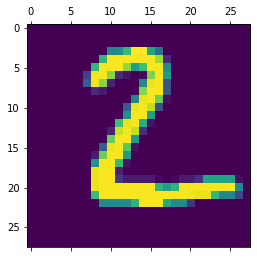

In [58]:
plt.matshow(x_test[1])

In [56]:
#testing and  evaluting  the model
y_pred=model.predict( np.expand_dims(x_test_flat[1], axis=0))

In [57]:
#printing the  result for first value
np.argmax(y_pred[0])

2

In [84]:
#model building with hidden  layer 
model_hidden=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])
model_hidden.compile(
optimizer="adam",
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [85]:
model_hidden.fit(x_test_flat,y_test,epochs=20)

Epoch 1/20
313/313 [==============================] - 0s 864us/step - loss: 0.5200 - accuracy: 0.8578
Epoch 2/20
313/313 [==============================] - 0s 950us/step - loss: 0.2398 - accuracy: 0.9312
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 0.1788 - accuracy: 0.9458
Epoch 4/20
313/313 [==============================] - 0s 892us/step - loss: 0.1375 - accuracy: 0.9607
Epoch 5/20
313/313 [==============================] - 0s 870us/step - loss: 0.1083 - accuracy: 0.9693
Epoch 6/20
313/313 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9733
Epoch 7/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0692 - accuracy: 0.9793
Epoch 8/20
313/313 [==============================] - 0s 906us/step - loss: 0.0559 - accuracy: 0.9849
Epoch 9/20
313/313 [==============================] - 0s 895us/step - loss: 0.0423 - accuracy: 0.9889
Epoch 10/20
313/313 [==============================] - 0s 937us/step - loss: 0.0336 - ac

In [86]:
#evaluting the  model
model_hidden.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 603us/step - loss: 0.0027 - accuracy: 1.0000


[0.0026832979638129473, 1.0]

In [87]:
y_pred_hidden=model_hidden.predict(x_test_flat)

In [88]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [89]:
cf=tf.math.confusion_matrix(labels=y_test,predictions=[np.argmax(i) for i in y_pred_hidden])

<AxesSubplot:>

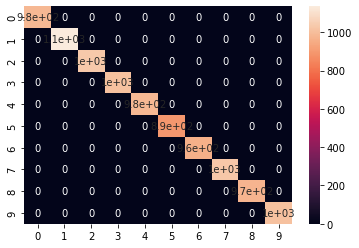

In [90]:
import seaborn  as  sns
sns.heatmap(cf,annot=True)